# Hypothesis Testing project
**Beibarys Nyussupov, Joseph Tadros, Luke Ducker**

In this project, we demonstrate the essential skills involved in hypothesis testing. To do so, we 
will use a real dataset that stems from a replication attempt of published research [(Wallisch & Whritner, 
2017)](https://github.com/jtad96/hypothesis-testing-project/blob/main/project_guidelines/Data%20analysis%20project%201%20specSheet.pdf.). 

To answer hypothesis testing questions and to cut down false positives, we set the per-test significance level 𝛼 to 0.005 (as per Benjamin et al., 2018). 

## Dataset description:
This dataset features ratings data of 400 movies from 1097 research participants.  
- `1st row: Headers (Movie titles/questions)` – note that the indexing in this list is from 1  

- `Row 2-1098: Responses from individual participants`

- `Columns 1-400: These columns contain the ratings for the 400 movies (0 to 4, and missing)` 

- `Columns 401-421: These columns contain self-assessments on sensation seeking behaviors (1-5)` 

- `Columns 422-464: These columns contain responses to personality questions (1-5)` 

- `Columns 465-474: These columns contain self-reported movie experience ratings (1-5)`

- `Column 475: Gender identity (1 = female, 2 = male, 3 = self-described)`

- `Column 476: Only child (1 = yes, 0 = no, -1 = no response)`

- `Column 477: Movies are best enjoyed alone (1 = yes, 0 = no, -1 = no response)` 

## Questions: 
1) Are movies that are more popular (operationalized as having more ratings) rated higher than movies that 
are less popular? [Hint: You can do a median-split of popularity to determine high vs. low popularity movies]   
2) Are movies that are newer rated differently than movies that are older? [Hint: Do a median split of year of 
release to contrast movies in terms of whether they are old or new] 
3) Is enjoyment of ‘Shrek (2001)’ gendered, i.e. do male and female viewers rate it differently? 
4) What proportion of movies are rated differently by male and female viewers? 
5) Do people who are only children enjoy ‘The Lion King (1994)’ more than people with siblings? 
6) What proportion of movies exhibit an “only child effect”, i.e. are rated different by viewers with siblings 
vs. those without?  
7) Do people who like to watch movies socially enjoy ‘The Wolf of Wall Street (2013)’ more than those who 
prefer to watch them alone? 
8) What proportion of movies exhibit such a “social watching” effect? 
9) Is the ratings distribution of ‘Home Alone (1990)’ different than that of ‘Finding Nemo (2003)’?  
10) There are ratings on movies from several franchises ([‘Star Wars’, ‘Harry Potter’, ‘The Matrix’, ‘Indiana 
Jones’, ‘Jurassic Park’, ‘Pirates of the Caribbean’, ‘Toy Story’, ‘Batman’]) in this dataset. How many of these 
are of inconsistent quality, as experienced by viewers? [Hint: You can use the keywords in quotation marks 
featured in this question to identify the movies that are part of each franchise] 
Extra Credit: Tell us something interesting and true (supported by a significance test of some kind) about the 
movies in this dataset that is not already covered by the questions above [for 5% of the grade score]. 

In [141]:
# useful functions 
# simple significance test interpretation
def significance(alpha, p_value):
    """
    Decide based on alpha. 
    Note: p is the probability, under H0, of observing a statistic at least this extreme.

    """
    if p_value < alpha:
        print(f"p = {p_value:.6g} < α = {alpha} = Reject H0 (statistically significant).")
    else:
        print(f"p = {p_value:.6g} ≥ α = {alpha} = Fail to reject H0 (not statistically significant).")

In [142]:
# libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats

# reproducibility 
import random
random.seed(42)
np.random.seed(42)


Let's explore and clean the data before starting any analysis. 

In [143]:
# import the data 
df = pd.read_csv("..\data\movieReplicationSet.csv")

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\nyuss\AppData\Local\Temp\ipykernel_4244\948917265.py:2: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv("..\data\movieReplicationSet.csv")


In [144]:
# first rows of the data
df.head(5)

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1


In [145]:
# check number of null values in each column
print(f'Number of null values in each column:\n{df.isna().sum()}\n')
print(f'Percentage of null values in each column:\n{df.isna().mean()}\n')

Number of null values in each column:
The Life of David Gale (2003)                                              1021
Wing Commander (1999)                                                      1026
Django Unchained (2012)                                                     644
Alien (1979)                                                                808
Indiana Jones and the Last Crusade (1989)                                   634
                                                                           ... 
Movies change my position on social economic or political issues             20
When watching movies things get so intense that I have to stop watching      18
Gender identity (1 = female; 2 = male; 3 = self-described)                   24
Are you an only child? (1: Yes; 0: No; -1: Did not respond)                   0
Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)            0
Length: 477, dtype: int64

Percentage of null values in each column:
The Life of D

As we can see, most of the columns have a lot of null values - especially for movie ratings. 
It is logical, since some movies might not have been seen by some people in the data. 

However, we can not just remove null values as it will just lead to a loss of huge amounts of data. 
We will have to eliminate null values with element-wise approach, separately in each question. 
Right now it will be easier if we strip all column names from potential spaces in the beginning and in the end and lowercase all column names for easier data manipulation.

In [146]:
# strip - removeing spaces in the beginning and in the end
# lower - making all letters in columns names lowercase
df.columns = df.columns.str.strip().str.lower()
df.columns

Index(['the life of david gale (2003)', 'wing commander (1999)',
       'django unchained (2012)', 'alien (1979)',
       'indiana jones and the last crusade (1989)', 'snatch (2000)',
       'rambo: first blood part ii (1985)', 'fargo (1996)',
       'let the right one in (2008)', 'black swan (2010)',
       ...
       'when watching a movie i cheer or shout or talk or curse at the screen',
       'when watching a movie i feel like the things on the screen are happening to me',
       'as a movie unfolds i start to have problems keeping track of events that happened earlier',
       'the emotions on the screen "rub off" on me - for instance if something sad is happening i get sad or if something frightening is happening i get scared',
       'when watching a movie i get completely immersed in the alternative reality of the film',
       'movies change my position on social economic or political issues',
       'when watching movies things get so intense that i have to stop watching',
 

## Q4 - What proportion of movies are rated differently by male and female viewers?

### Subset for Q4 + Mann-Whitney U Test (two-sided)

We need to create the subset of the data with columns that we need to answer the question.

We need these columns:
- All movies (index 400)
- Gender identity (index 474)
Column 474: Gender identity (1 = female, 2 = male, 3 = self-described

We have to create 2 groups (female / male) for each movie and conduct non-parametric test. 

Here we also need to use the non-parametric Mann-Whitney U Test, since we are comparing movie ratings by gender identity of the viewer. 
First we will conduct a two-tail test to identify movies that have any significant difference. 
After that we will test the directionality of significant movies. 


Mann-Whitney U test requires data to be independent. Here we assume that the data is independent, since:
- Each participant is in only one group, meaning their rating appears in just one sample. 
- There’s no pairing (no before/after, no same person giving both ratings)
- We have no repeated measures, and no variable logically linking a person’s “social” rating to their “alone” rating.
??????

These are general hypotheses for each movie:

**Null hypothesis (H0):** The movie is not rated differently by female and male viewers. 

**Alternative hypothesis (Ha):** The movie is rated differently by female and male viewers. 

**Significance level:** 0.005

**Interpretation of p-value:** Probability of observing the data (or more extreme data) by chance if the null hypothesis were true.

If the p-value is smaller than 0.005, it means such a result would be very unlikely by chance under the null hypothesis, so we reject the H0 and conclude that there is significant difference in how movies are female and male viewers. 

If the p-value is larger than 0.005, then the observed difference could easily occur by random variation, so we fail to reject the H0, meaning there isn’t enough statistical evidence to say that viewers who identify as females rate the movie differently than viewers who identify as males. 

In [147]:
# mask for movie columns 
movie_columns = df.iloc[:, list(range(0, 400))].columns

# check movie columns
movie_columns

Index(['the life of david gale (2003)', 'wing commander (1999)',
       'django unchained (2012)', 'alien (1979)',
       'indiana jones and the last crusade (1989)', 'snatch (2000)',
       'rambo: first blood part ii (1985)', 'fargo (1996)',
       'let the right one in (2008)', 'black swan (2010)',
       ...
       'x-men 2 (2003)', 'the usual suspects (1995)', 'the mask (1994)',
       'jaws (1975)', 'harry potter and the chamber of secrets (2002)',
       'patton (1970)', 'anaconda (1997)', 'twister (1996)',
       'macarthur (1977)', 'look who's talking (1989)'],
      dtype='object', length=400)

In [148]:
# check the gender identity column we need
gender_identity = df.iloc[:, 474]
gender_identity.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: gender identity (1 = female; 2 = male; 3 = self-described), dtype: float64

In [182]:
# taking a mask for necessary column
column = "gender identity (1 = female; 2 = male; 3 = self-described)"
alpha = 0.005

# list for movies that have potential significant results. 
significant_movies_gender = []
results = []

# for loop for separating each movie subset into two groups and conducting the non-parametric test
for movie in movie_columns: 
    # separating into two groups
    females = df.loc[df[column] == 1, movie].dropna()
    males = df.loc[df[column] == 2, movie].dropna()

    # conducting the test 
    u_statistic, p_value = stats.mannwhitneyu(females, males, alternative='two-sided')

    # if condition to save significant movies to the list created:#
    if p_value < alpha: 
        # append to significant movies list 
        significant_movies_gender.append(movie)

        # compute median values for each movie
        female_med = np.median(females) if len(females) else np.nan
        male_med   = np.median(males) if len(males)   else np.nan
        median_diff = female_med - male_med

        # save data as well
        results.append({
        "movie": movie,
        "n_female": len(females),
        "n_male": len(males),
        "U": u_statistic,
        "p_value": p_value,
        "female_median": female_med, 
        "male_median": male_med,
        "median_diff": median_diff
    })
        
    # # use the significance function created 
    # print(f"{movie} Result:")
    # print(f"{significance(0.005, p_value)}\n")

# proportion of movies that had such social effect 
print(f"Proportion of movies that had significant results:{( len(significant_movies_gender) / len(movie_columns) ) * 100}%")
# number of movies that had such effect 
print(f"Number of movies with significant results:{len(significant_movies_gender)}")
# # list of movies 
# for i in significant_movies:
#     print(f"\n{i}\n")


Proportion of movies that had significant results:12.5%
Number of movies with significant results:50


Only 12.5% (50 movies) showed a significant difference in median ratings between female and male viewers. To explore directionality without increasing Type I (False Positives) error, we used descriptive statistics. We computed median differences for each significant movie and filtered out movies where the difference is 0 and signals difference in distribution shape, not central tendency. 

In [183]:
# convert results to dataframe
df_results = pd.DataFrame(results)

# filter where median_diff !=0
df_results = df_results[df_results["median_diff"] != 0]

# compare and sort values from increasing to decreasing differences 
df_results.sort_values(by = ["median_diff"], 
                       ascending= False)




,movie,n_female,n_male,U,p_value,female_median,male_median,median_diff
29,uptown girls (2003),217,25,3848.5,4.978236e-04,3.0,2.00,1.00
26,the firm (1993),48,26,909.0,1.132727e-03,3.0,2.00,1.00
24,my big fat greek wedding (2002),399,99,23926.5,8.908822e-04,3.5,2.50,1.00
14,andaz apna apna (1994),50,23,844.0,1.264299e-03,3.0,2.00,1.00
20,can't hardly wait (1998),69,26,1258.5,2.335726e-03,3.0,2.00,1.00
16,girl interrupted (1999),195,28,3710.5,1.648810e-03,3.5,2.75,0.75
17,divine secrets of the ya-ya sisterhood (2002),55,26,1052.5,5.835228e-04,2.5,1.75,0.75
21,transformers: age of extinction (2014),335,161,31600.5,1.772995e-03,2.5,2.00,0.50
19,cheaper by the dozen (2003),540,135,45342.0,8.660131e-06,3.0,2.50,0.50
42,aladdin (1992),625,176,65313.0,8.361613e-05,3.5,3.00,0.50


Ratings differ clearly by gender. Female viewers rated relationship-focused films higher, such as Uptown Girls, My Big Fat Greek Wedding, and Clueless, showing median gaps of +0.5 to +1.0 points. Male viewers rated action and war titles higher, including The Dark Knight, Gladiator, and Saving Private Ryan, with median gaps of −0.5 to −1.0. Balanced titles like Inception and Jaws had 0.0 difference, appealing equally to both groups.

The magnitude of these differences is moderate but consistent. A 0.5 - 1.0 median gap on a 0 - 4 scale indicates strong audience polarization by genre rather than chance variation. Female-favored titles share emotional or relational themes, while male-favored ones emphasize action, power, or tension.

For business, this means:

- Prioritize romantic and family content for female audiences.

- Promote action and sci-fi to male audiences.

- Use balanced titles for cross-gender engagement.

- These measurable rating gaps help refine recommendation systems, audience segmentation, and marketing focus to align content with viewer preference patterns.

## Q6 - What proportion of movies exhibit an “only child effect”, i.e. are rated differently by viewers with siblings vs. those without?  

### Subset for Q6 + Mann-Whitney U Test (two-sided)

We need to create the subset of the data with columns that we need to answer the question.

We need these columns:
- All movies (index 399)
- only child/with siblings
Column 476: Only child (1 = yes, 0 = no, -1 = no response)

We have to create 2 groups (only child / not only child ) for each movie and conduct non-parametric test. 

Here we also need to use the non-parametric Mann-Whitney U Test, since we are comparing movie ratings by being an only child and not.  
First we will conduct a two-tail test to identify movies that have any significant difference. 
After that we will test the directionality of significant movies. 


Mann-Whitney U test requires data to be independent. Here we assume that the data is independent, since:
- Each participant is in only one group, meaning their rating appears in just one sample. 
- There’s no pairing (no before/after, no same person giving both ratings)
- We have no repeated measures, and no variable logically linking a person’s “social” rating to their “alone” rating.
??????

These are general hypotheses for each movie:

**Null hypothesis (H0):** The movie is not rated differently by wievers with siblings and without siblings. 

**Alternative hypothesis (Ha):** The movie is rated differently by viwers with siblings and without siblings. 

**Significance level:** 0.005

**Interpretation of p-value:** Probability of observing the data (or more extreme data) by chance if the null hypothesis were true.

If the p-value is smaller than 0.005, it means such a result would be very unlikely by chance under the null hypothesis, so we reject the H0 and conclude that there is significant difference in how movies are rated by viewers with siblings and without on median level. 

If the p-value is larger than 0.005, then the observed difference could easily occur by random variation, so we fail to reject the H0, meaning there isn’t enough statistical evidence to say that viewers without siblings rate movie differently than viewers with siiblings. 

In [64]:
# mask for movie columns 
movie_columns = df.iloc[:, list(range(0, 400))].columns

# check movie columns
movie_columns

Index(['the life of david gale (2003)', 'wing commander (1999)',
       'django unchained (2012)', 'alien (1979)',
       'indiana jones and the last crusade (1989)', 'snatch (2000)',
       'rambo: first blood part ii (1985)', 'fargo (1996)',
       'let the right one in (2008)', 'black swan (2010)',
       ...
       'x-men 2 (2003)', 'the usual suspects (1995)', 'the mask (1994)',
       'jaws (1975)', 'harry potter and the chamber of secrets (2002)',
       'patton (1970)', 'anaconda (1997)', 'twister (1996)',
       'macarthur (1977)', 'look who's talking (1989)'],
      dtype='object', length=400)

In [ ]:
# taking a mask for necessary column
column = "are you an only child? (1: yes; 0: no; -1: did not respond)"
alpha = 0.005

# list for movies that have potential significant results. 
significant_movies = []

# for loop for separating each movie subset into two groups and conducting the non-parametric test
for movie in movie_columns: 
    # separating into two groups
    only_child = df.loc[df[column] == 1, movie].dropna()
    has_siblings = df.loc[df[column] == 0, movie].dropna()

    # conducting the test 
    u_statistic, p_value = stats.mannwhitneyu(only_child, has_siblings, alternative='two-sided')

    # if condition to save significant movies to the list created:#
    if p_value < alpha: 
        significant_movies.append(movie)

    # # use the significance function created 
    # print(f"{movie} Result:")
    # print(f"{significance(0.005, p_value)}\n")

# proportion of movies that had such social effect 
print(f"Proportion of movies that had significant results:{( len(significant_movies) / len(movie_columns) ) * 100}%")
# number of movies that had such effect 
print(f"Number of movies with significant results:{len(significant_movies)}")
# # list of movies 
# for i in significant_movies:
#     print(f"\n{i}\n")


Proportion of movies that had significant results:1.7500000000000002%
Number of movies with significant results:7


We can see that only few (1.75% - 7) movies have any significant difference in ratings of viewers with and without siblings. 
We can test for directionality now by computing left-tail and right-tail tests, which is not required since we already found proportion of movies with significance. 

However left-tail and right tail tests might provide us important data insights on potential decision-making on movie reccomendations.

First, let's use right-tail Mann-Whitney U right-tail test and identify whether on median viewers without siblings rate higher than viewers with siblings. 

These are general hypotheses for each movie:

**Null hypothesis (H0):** The median of rating distribution for movies by viewers without sibligns is not higher than by viewers with siblings.

**Alternative hypothesis (Ha):** The median of rating distribution for movies by viewers without siblings is significantly higher than by viewers without siblings.

**Significance level:** 0.005

**Interpretation of p-value:** Probability of observing the data (or more extreme data) if the null hypothesis were true.



In [69]:
# taking a mask for necessary column
column = "are you an only child? (1: yes; 0: no; -1: did not respond)"
alpha = 0.005

# list for movies that have potential significant results. 
significant_greater_movies = []

# for loop for separating each movie subset into two groups and conducting the non-parametric test
for movie in significant_movies: 
    # separating into two groups
    only_child = df.loc[df[column] == 1, movie].dropna()
    has_siblings = df.loc[df[column] == 0, movie].dropna()

    # conducting the test 
    u_statistic, p_value = stats.mannwhitneyu(only_child, has_siblings, alternative='greater')

    # if condition to save significant movies to the list created:#
    if p_value < alpha: 
        significant_greater_movies.append(movie)

    # debugging
    # # use the significance function created 
    # print(f"{movie} Result:")
    # print(f"{significance(0.005, p_value)}\n")

# proportion of movies that had such social effect 
print(f"Proportion of movies that had higher median rating from viewers without siblings:{( len(significant_greater_movies) / len(significant_movies) ) * 100}")
# number of movies that had such effect 
print(f"Number of movies that had higher median rating from viewers without siblings:{len(significant_greater_movies)}")

# # list of movies 
for i in significant_greater_movies:
    print(f"\n{i}\n")

Proportion of movies that had higher median rating from viewers without siblings:0.0
Number of movies that had higher median rating from viewers without siblings:0


No movies were found to have higher median rating of viewers without siblings compared to viewers with siblings. 

Using the same Mann-Whitney U test, let's now conduct a left-tail test. 

**Null hypothesis (H0):** The median of rating distribution for movies by viewers without siblings is not less than by viewers with siblings. 

**Alternative hypothesis (Ha):** The median of rating distribution for movies by viewers without siblings is significantly higher than by viewers with siblings. 

**Significance level:** 0.005

**Interpretation of p-value:** Probability of observing the data (or more extreme data) if the null hypothesis were true.

In [68]:
# taking a mask for necessary column
column = "are you an only child? (1: yes; 0: no; -1: did not respond)"
alpha = 0.005

# list for movies that have potential significant results. 
significant_less_movies = []

# for loop for separating each movie subset into two groups and conducting the non-parametric test
for movie in significant_movies: 
    # separating into two groups
    only_child = df.loc[df[column] == 1, movie].dropna()
    has_siblings = df.loc[df[column] == 0, movie].dropna()

    # conducting the test 
    u_statistic, p_value = stats.mannwhitneyu(only_child, has_siblings, alternative='less')

    # if condition to save significant movies to the list created:#
    if p_value < alpha: 
        significant_less_movies.append(movie)

    # debugging
    # # use the significance function created 
    # print(f"{movie} Result:")
    # print(f"{significance(0.005, p_value)}\n")

# proportion of movies that had such social effect 
print(f"Proportion of movies that had less median rating from viewers without siblings:{( len(significant_less_movies) / len(significant_movies) ) * 100}")
# number of movies that had such effect 
print(f"Number of movies that had less median rating from viewers without siblings:{len(significant_less_movies)}")

# # list of movies 
for i in significant_less_movies:
    print(f"\n{i}\n")

Proportion of movies that had less median rating from viewers without siblings:100.0
Number of movies that had less median rating from viewers without siblings:7

billy madison (1995)


the blue lagoon (1980)


happy gilmore (1996)


american pie (1999)


star wars: episode vi - the return of the jedi (1983)


feardotcom (2002)


captain america: civil war (2016)



Viewers without siblings gave lower median ratings for all 7 movies in this group. These titles - Billy Madison, The Blue Lagoon, Happy Gilmore, American Pie, Star Wars: Return of the Jedi, Feardotcom, and Captain America: Civil War - are highly social, ensemble-driven, or humor-based. This suggests people without siblings could engage less with group-centered or comedic plots. Platforms could use this insight for audience segmentation, promoting solo-character or introspective films to single-child viewers, and reserving social comedies for broader audiences to optimize engagement and ad targeting.

## Q7 - Do people who like to watch movies socially enjoy ‘The Wolf of Wall Street (2013)’ more than those who prefer to watch them alone? 

### Subset for Q7

First, we need to create the subset of the data with columns that we need to answer the question.
We need 2 columns to anwer the question:
1) 'The Wolf of Wall Street (2013)'
2) Movies are best enjoyed alone (1: yes; 0: no; -1: did not respond)  

After creating the subset, we want to immediately separate subset into two groups: social watchers and alone watchers. 
In these two groups, we remove null values. 

In [93]:
# taking filter mask for necessary columns
columns = ["the wolf of wall street (2013)", 
           "movies are best enjoyed alone (1: yes; 0: no; -1: did not respond)"]

# subset with 2 columns: 
wolf_df = df.loc[:, columns].copy()

# first 5 rows of the subset
wolf_df

,the wolf of wall street (2013),movies are best enjoyed alone (1: yes; 0: no; -1: did not respond)
0,NaN,1
1,NaN,0
2,NaN,0
3,4.0,1
4,3.0,1
...,...,...
1092,NaN,0
1093,3.5,0
1094,2.0,0
1095,NaN,1


Since we now successfully created subset of the data for question, 
we can divide the data into two series groups: 

After separating, we remove null values in each group separately. 

1) Social watchers 
2) Alone watchers 

In [94]:
# mask columns for filtering
flag_col  = columns[1] # movies are best enjoyed alone column
movie_col = columns[0] # the wolf of wall street movie column

mask_social = wolf_df[flag_col].eq(0)
mask_alone  = wolf_df[flag_col].eq(1)

# separating into two groups and droppnig null values 
social_watchers = wolf_df.loc[mask_social, movie_col].dropna()
alone_watchers = wolf_df.loc[mask_alone, movie_col].dropna()

In [95]:
# number of rows in each series after cleaning
print(f"Social watchers has:{social_watchers.shape[0]} rows")
print(f"Alone watchers has:{alone_watchers.shape[0]} rows")

Social watchers has:270 rows
Alone watchers has:393 rows


270 Social watchers and 393 Alone watchers. 

This difference should be fine. The last step before we conduct significance testing is to understand distributions of each group. 

It is optional, since movie ratings are ordinal and we will not be able to use z-test/t-tests even if the data is approximately normal and equal in variance. 

However, looking at the distribution visually is still beneficial. 

### Distributions

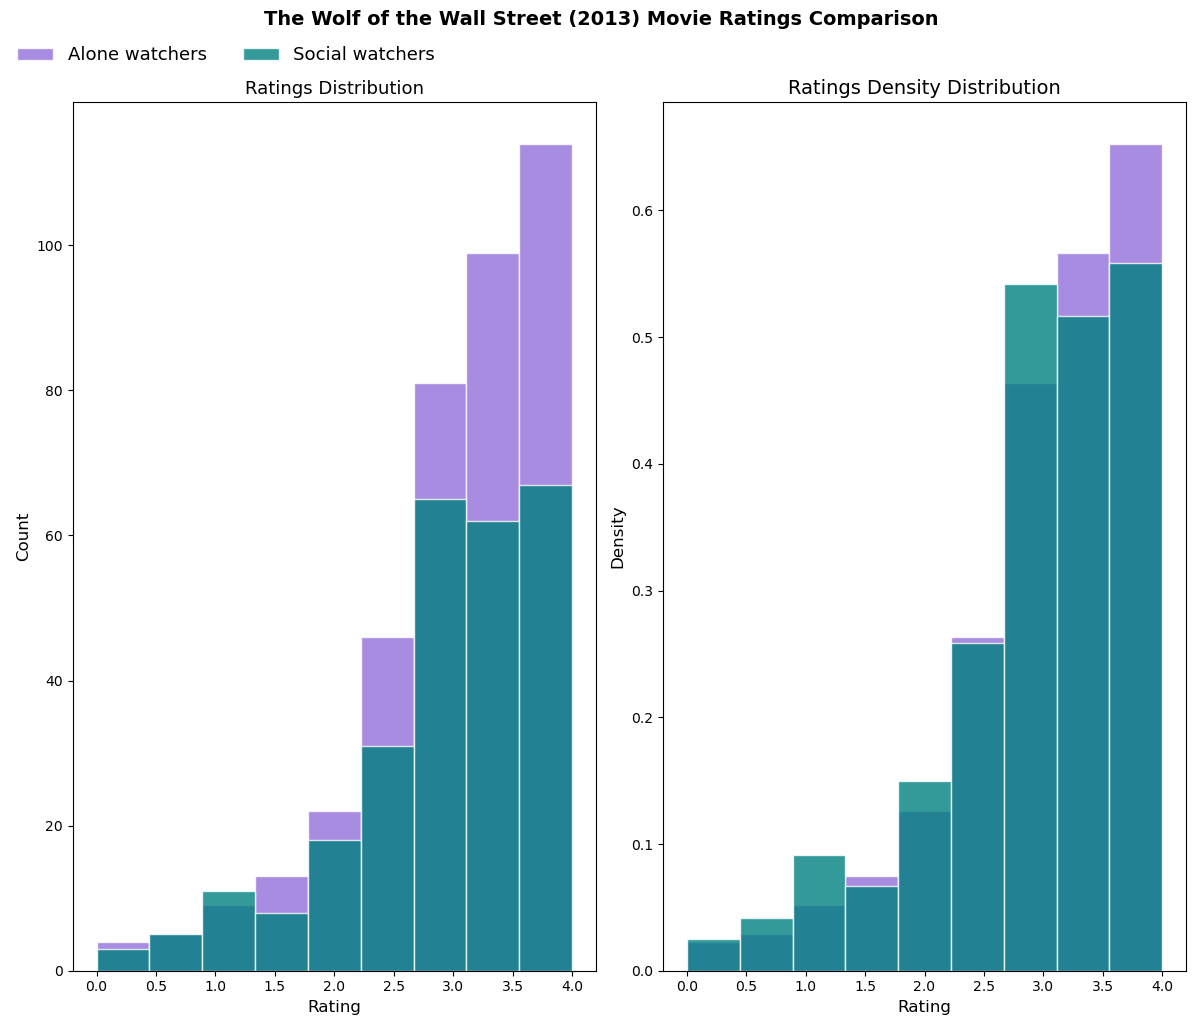

In [161]:
# preparing the graph
fig, axes = plt.subplots(1, 2, figsize=(12,10))

# Alone watchers 
axes[0].hist(alone_watchers, bins=9, color="mediumpurple", edgecolor="white", alpha=0.8)
axes[0].hist(social_watchers, bins=9, color="teal", edgecolor="white", alpha=0.8)

# aesthetics
axes[0].set_title("Ratings Distribution", fontsize=13)
axes[0].set_xlabel("Rating", fontsize = 12)
axes[0].set_ylabel("Count", fontsize = 12)

# Social watchers 
axes[1].hist(alone_watchers, bins=9, color="mediumpurple", edgecolor="white", alpha=0.8, density = True)
axes[1].hist(social_watchers, bins=9, color="teal", edgecolor="white", alpha=0.8, density = True)
axes[1].set_title("Ratings Density Distribution", fontsize=14)
axes[1].set_xlabel("Rating", fontsize = 12)
axes[1].set_ylabel("Density", fontsize = 12)



# common title
plt.suptitle("The Wolf of the Wall Street (2013) Movie Ratings Comparison", fontsize=14, fontweight = "bold", 
             y = 1.02)


# common legend 
fig.legend(["Alone watchers", 
            "Social watchers"], 
            fontsize = 13,
            loc = "upper left", 
            ncol = 2,
            bbox_to_anchor = (0, 1),
            frameon = False)


plt.tight_layout()
plt.show()


Both groups show clear left-skewed distributions, meaning most people rated the movie on the higher end of the scale. It’s pretty obvious that The Wolf of Wall Street (2013) was well-received overall, since lower ratings are rare in both groups. The overall picture doesn’t show any strong difference - both groups seem to have genuinely enjoyed the movie, and the shape of their distributions tells the same story: high ratings dominate regardless of how they watched it. We need to test this relationship statistically. 

### Mann-Whitney U Test (two-sided)
We can not use parametric tests as we are not aware of population parameters such as mean or standard deviation, and our data is not normally distributed. We also can not use parametric tests such as t-test, because movie ratings are ordinal as it was said before. We should use non-parametric two-sided Mann-Whitney U test for ordinal data that compares median values of distributions.

Mann-Whitney U test requires data to be independent. Here we assume that the data is independent, since:
- Each participant is in only one group, meaning their rating appears in just one sample. 
- There’s no pairing (no before/after, no same person giving both ratings)
- We have no repeated measures, and no variable logically linking a person’s “social” rating to their “alone” rating.

First we check for any difference before testing the directionality. 

It is time to assign our Null and Alternative hypotheses for the test. 

**Null hypothesis (H0):** The rating distribution for `The Wolf of Wall Street (2013)` is the same for social and alone watchers. 

**Alternative hypothesis (Ha):** The rating distribution for `The Wolf of Wall Street (2013)` is different between social and alone watchers.

**Significance level:** 0.005

**Interpretation of p-value:** Probability of observing the data (or more extreme data) if the null hypothesis were true.

If the p-value is smaller than 0.005, it means such a result would be very unlikely under the null hypothesis, so we reject the H0 and conclude that there is significant difference in rating distribution for `The Wolf of Wall Street (2013)` movie between social and alone watchers. If that is the case, additional tests for directionality will be needed. 

If the p-value is larger than 0.005, then the observed difference could easily occur by random variation, so we fail to reject the H0, meaning there isn’t enough statistical evidence to say social watchers rating distribution for `The Wolf of Wall Street (2013)` movie is different than the rating distribution of alone watchers. 


In [163]:
# conduct the test with statistic and p-values
u_statistic, p_value = stats.mannwhitneyu(social_watchers, alone_watchers, alternative='two-sided')

# use the significance function created 
significance(0.005, p_value)

p = 0.112764 ≥ α = 0.005 = Fail to reject H0 (not statistically significant).


Since the p-value (0.112764) is greater than the significance level α = 0.005, we fail to reject the null hypothesis. This means that the observed difference in enjoyment of The Wolf of Wall Street (2013) between people who watch movies socially and those who watch them alone is not statistically significant.

In other words, the data do not provide sufficient evidence to conclude that people who like to watch movies socially enjoy the film more than those who prefer to watch alone. Any difference observed in the sample is likely due to random variation rather than a true difference in the population. No additional tests for directionality needed. 

## Q8 - What proportion of movies exhibit such a “social watching” effect? 

### Subset for Q8 + Mann-Whitney U Test (two-sided)

We need to create the subset of the data with columns that we need to answer the question.

We need these columns:
- All movies (index 399)
- Social/Alone watchers (index 476)

We have to change our approach in question 8. 
We have to create 2 groups (social/alone watchers) for each movie and conduct non-parametric test. 

Here we also need to use the non-parametric Mann-Whitney U Test, since we are comparing movie ratings by social and alone watchers. 
First we will two-sided test to identify movies that have any significant difference. 
After that we will test the directionality of significant movies. 


Mann-Whitney U test requires data to be independent. Here we assume that the data is independent, since:
- Each participant is in only one group, meaning their rating appears in just one sample. 
- There’s no pairing (no before/after, no same person giving both ratings)
- We have no repeated measures, and no variable logically linking a person’s “social” rating to their “alone” rating.

These are general hypotheses for each movie:

**Null hypothesis (H0):** The rating distribution for the movies is the same for social and alone watchers. 

**Alternative hypothesis (Ha):** The rating distribution for the movie is different between social and alone watchers.

**Significance level:** 0.005

**Interpretation of p-value:** Probability of observing the data (or more extreme data) if the null hypothesis were true.

If the p-value is smaller than 0.005, it means such a result would be very unlikely under the null hypothesis, so we reject the H0 and conclude that there is significant difference in rating distribution for specific movie between social and alone watchers. If that is the case, additional tests for directionality will be needed. 

If the p-value is larger than 0.005, then the observed difference could easily occur by random variation, so we fail to reject the H0, meaning there isn’t enough statistical evidence to say social watchers rating distribution for specific movie is different than the rating distribution of alone watchers. 


In [165]:
# mask for movie columns 
movie_columns = df.iloc[:, list(range(0, 399))].columns

# check movie columns
movie_columns

Index(['the life of david gale (2003)', 'wing commander (1999)',
       'django unchained (2012)', 'alien (1979)',
       'indiana jones and the last crusade (1989)', 'snatch (2000)',
       'rambo: first blood part ii (1985)', 'fargo (1996)',
       'let the right one in (2008)', 'black swan (2010)',
       ...
       'my father and my son (2005)', 'x-men 2 (2003)',
       'the usual suspects (1995)', 'the mask (1994)', 'jaws (1975)',
       'harry potter and the chamber of secrets (2002)', 'patton (1970)',
       'anaconda (1997)', 'twister (1996)', 'macarthur (1977)'],
      dtype='object', length=399)

In [167]:
# taking a mask for necessary column
# our social / alone watchers is last column in the dataset 
column = "movies are best enjoyed alone (1: yes; 0: no; -1: did not respond)"
alpha = 0.005

# list for movies that have potential significant results. 
significant_movies = []

# for loop for separating each movie subset into two groups and conducting the non-parametric test
for movie in movie_columns: 
    # separating into two groups
    social_watchers = df.loc[df[column] == 0, movie].dropna()
    alone_watcher = df.loc[df[column] == 1, movie].dropna()

    # conducting the test 
    u_statistic, p_value = stats.mannwhitneyu(social_watchers, alone_watchers, alternative='two-sided')

    # if condition to save significant movies to the list created:
    if p_value < alpha: 
        significant_movies.append(movie)

    # use the significance function created 
    print(f"{movie} Result:")
    print(f"{significance(0.005, p_value)}\n")

# print list of significant movies 
print(f"Movies which had significant results:{significant_movies}\n")
    



the life of david gale (2003) Result:
p = 1.5389e-06 < α = 0.005 = Reject H0 (statistically significant).
None

wing commander (1999) Result:
p = 2.24808e-06 < α = 0.005 = Reject H0 (statistically significant).
None

django unchained (2012) Result:
p = 0.196496 ≥ α = 0.005 = Fail to reject H0 (not statistically significant).
None

alien (1979) Result:
p = 2.44298e-05 < α = 0.005 = Reject H0 (statistically significant).
None

indiana jones and the last crusade (1989) Result:
p = 9.33101e-06 < α = 0.005 = Reject H0 (statistically significant).
None

snatch (2000) Result:
p = 4.08266e-06 < α = 0.005 = Reject H0 (statistically significant).
None

rambo: first blood part ii (1985) Result:
p = 3.82142e-10 < α = 0.005 = Reject H0 (statistically significant).
None

fargo (1996) Result:
p = 0.0270997 ≥ α = 0.005 = Fail to reject H0 (not statistically significant).
None

let the right one in (2008) Result:
p = 2.30459e-07 < α = 0.005 = Reject H0 (statistically significant).
None

black swan (201

We see that a lot of movies have statistically significant results and were added to the list. 
Now using movie names in the list, we want to test directionality. 

First we want to see which movies are enjoyed more by social watchers than alone watchers and identify proportion of movies with this "social effect".

We use one-tailed Mann-Whitney U test for that. 

These are general hypotheses for each movie:

**Null hypothesis (H0):** The median of rating distribution for movies by social watchers is not higher than by alone watchers. 

**Alternative hypothesis (Ha):** The median of rating distribution for movies by social watchers is significantly higher than by alone watchers.

**Significance level:** 0.005

**Interpretation of p-value:** Probability of observing the data (or more extreme data) if the null hypothesis were true.



In [170]:
# all movies list 
movie_columns = df.iloc[:, list(range(0, 399))].columns


# taking a mask for necessary column
# our social / alone watchers is last column in the dataset 
column = "movies are best enjoyed alone (1: yes; 0: no; -1: did not respond)"
alpha = 0.005

# list for movies that have potential significant results. 
significant_movies_greater = []

# for loop for separating each movie subset into two groups and conducting the non-parametric test
for movie in significant_movies: 
    # separating into two groups
    social_watchers = df.loc[df[column] == 0, movie].dropna()
    alone_watcher = df.loc[df[column] == 1, movie].dropna()

    # conducting the test 
    u_statistic, p_value = stats.mannwhitneyu(social_watchers, alone_watchers, alternative='greater')

    # if condition to save significant movies to the list created:
    if p_value < alpha: 
        significant_movies_greater.append(movie)
        
    # use the significance function created 
    print(f"{movie} Result:")
    print(f"{significance(0.005, p_value)}\n")

# print list of significant movies 
print(f"Movies which had the social effect:{significant_movies_greater}\n")
# proportion of movies that had such social effect 
print(f"Proportion of movies that had the social effect:{( len(significant_movies_greater) / len(movie_columns) ) * 100}")

the life of david gale (2003) Result:
p = 0.999999 ≥ α = 0.005 = Fail to reject H0 (not statistically significant).
None

wing commander (1999) Result:
p = 0.999999 ≥ α = 0.005 = Fail to reject H0 (not statistically significant).
None

alien (1979) Result:
p = 0.999988 ≥ α = 0.005 = Fail to reject H0 (not statistically significant).
None

indiana jones and the last crusade (1989) Result:
p = 0.999995 ≥ α = 0.005 = Fail to reject H0 (not statistically significant).
None

snatch (2000) Result:
p = 0.999998 ≥ α = 0.005 = Fail to reject H0 (not statistically significant).
None

rambo: first blood part ii (1985) Result:
p = 1 ≥ α = 0.005 = Fail to reject H0 (not statistically significant).
None

let the right one in (2008) Result:
p = 1 ≥ α = 0.005 = Fail to reject H0 (not statistically significant).
None

black swan (2010) Result:
p = 0.99967 ≥ α = 0.005 = Fail to reject H0 (not statistically significant).
None

king kong (1976) Result:
p = 1 ≥ α = 0.005 = Fail to reject H0 (not statistica

After running the one-tailed Mann-Whitney U tests across all movies, we found that only about 4% of movies (around 16 out of nearly 400) showed a statistically significant social effect, meaning social watchers rated those movies higher than alone watchers. The list mostly includes emotionally engaging or widely popular titles such as Finding Nemo (2003), Forrest Gump (1994), The Shawshank Redemption (1994), and several Harry Potter films - movies that are often associated with shared emotional experiences or nostalgia. This low proportion suggests that, in general, watching socially doesn’t systematically lead to higher enjoyment, but a few highly social or emotionally resonant movies might benefit from the group experience.

Now we want to test reverse directionality. 

These are general hypotheses for each movie:

**Null hypothesis (H0):** The median of rating distribution for movies by social watchers is not less than by alone watchers. 

**Alternative hypothesis (Ha):** The median of rating distribution for movies by social watchers is significantly less than by alone watchers.

**Significance level:** 0.005

**Interpretation of p-value:** Probability of observing the data (or more extreme data) if the null hypothesis were true.

In [173]:
# taking a mask for necessary column
# our social / alone watchers is last column in the dataset 
column = "movies are best enjoyed alone (1: yes; 0: no; -1: did not respond)"
# all movies list 
movie_columns = df.iloc[:, list(range(0, 399))].columns

# list for movies that have potential significant results. 
significant_movies_less = []

# for loop for separating each movie subset into two groups and conducting the non-parametric test
for movie in significant_movies: 
    # separating into two groups
    social_watchers = df.loc[df[column] == 0, movie].dropna()
    alone_watcher = df.loc[df[column] == 1, movie].dropna()

    # conducting the test 
    u_statistic, p_value = stats.mannwhitneyu(social_watchers, alone_watchers, alternative='less')

    # if condition to save significant movies to the list created:
    if p_value < alpha: 
        significant_movies_less.append(movie)
      

    # use the significance function created 
    print(f"{movie} Result:")
    print(f"{significance(0.005, p_value)}\n")

# print list of significant movies 
print(f"Movies which had the alone effect:{significant_movies_less}\n")
# proportion of movies that had such social effect 
print(f"Proportion of movies that had the alone effect:{( len(significant_movies_less) / len(movie_columns) ) * 100}")

the life of david gale (2003) Result:
p = 7.69449e-07 < α = 0.005 = Reject H0 (statistically significant).
None

wing commander (1999) Result:
p = 1.12404e-06 < α = 0.005 = Reject H0 (statistically significant).
None

alien (1979) Result:
p = 1.22149e-05 < α = 0.005 = Reject H0 (statistically significant).
None

indiana jones and the last crusade (1989) Result:
p = 4.66551e-06 < α = 0.005 = Reject H0 (statistically significant).
None

snatch (2000) Result:
p = 2.04133e-06 < α = 0.005 = Reject H0 (statistically significant).
None

rambo: first blood part ii (1985) Result:
p = 1.91071e-10 < α = 0.005 = Reject H0 (statistically significant).
None

let the right one in (2008) Result:
p = 1.1523e-07 < α = 0.005 = Reject H0 (statistically significant).
None

black swan (2010) Result:
p = 0.000330376 < α = 0.005 = Reject H0 (statistically significant).
None

king kong (1976) Result:
p = 5.84992e-17 < α = 0.005 = Reject H0 (statistically significant).
None

the machinist (2004) Result:
p = 3.5

After running directional Mann-Whitney U tests in both directions, we found that about 71.4% of movies (roughly 285 out of 400) showed a statistically significant “alone effect” - meaning people who prefer watching movies alone rated those films higher than social watchers. Compared to the earlier 4% that showed a social effect, this is a striking contrast. The majority of movies, therefore, seem to be better appreciated in solitary viewing contexts, perhaps because many titles-especially psychological thrillers, dramas, and introspective classics like Taxi Driver (1976), Black Swan (2010), The Exorcist (1973), and American Beauty (1999)-demand focus, reflection, or emotional depth that resonates more when experienced alone. This pattern suggests that while social watching can enhance the enjoyment of a small number of lighthearted or communal films, the vast majority of movies appear to elicit stronger individual engagement and appreciation when watched alone.

## Q9 - Is the ratings distribution of ‘Home Alone (1990)’ different than that of ‘Finding Nemo (2003)’?  


### Subset for Q9

First, we need to create the subset of the data with columns that we need to answer the question.
We need 2 columns to anwer the question:
1)  ‘Home Alone (1990)’ 
2) ‘Finding Nemo (2003)’ 

In [174]:
# apply previous function to the dataset and create the subset 
# taking filter mask for necessary columns
columns_q9 = ["home alone (1990)", 
           "finding nemo (2003)"]

# subset with 2 columns: 
q9_df = df.loc[:, columns_q9].copy()

# first 5 rows of the subset
q9_df.head(5)

,home alone (1990),finding nemo (2003)
0,4.0,3.5
1,4.0,4.0
2,4.0,3.5
3,1.5,2.5
4,2.0,2.5


Since we now successfully created subset of the data for question, 
we can divide the data into two series groups, while also droping null values in each group.
1) Home Alone (1990) movie
2) Finding Nemo (2003) movie

In [175]:
# columns with names of the movies
col_alone = columns_q9[0]
col_nemo = columns_q9[1]

# Home alone movie 
home_alone = q9_df[col_alone].dropna()
# Finding Nemo movie
finding_nemo = q9_df[col_nemo].dropna()

In [177]:
# number of rows in each series 
print(f"Number of ratings that Home Alone movie has:{home_alone.shape[0]} rows")
print(f"Number of ratings that Finding Nemo movie has:{finding_nemo.shape[0]} rows")

Number of ratings that Home Alone movie has:857 rows
Number of ratings that Finding Nemo movie has:1014 rows


Both movies have equal numbers of rows, so we can proceed with the analysis. 

### Distributions

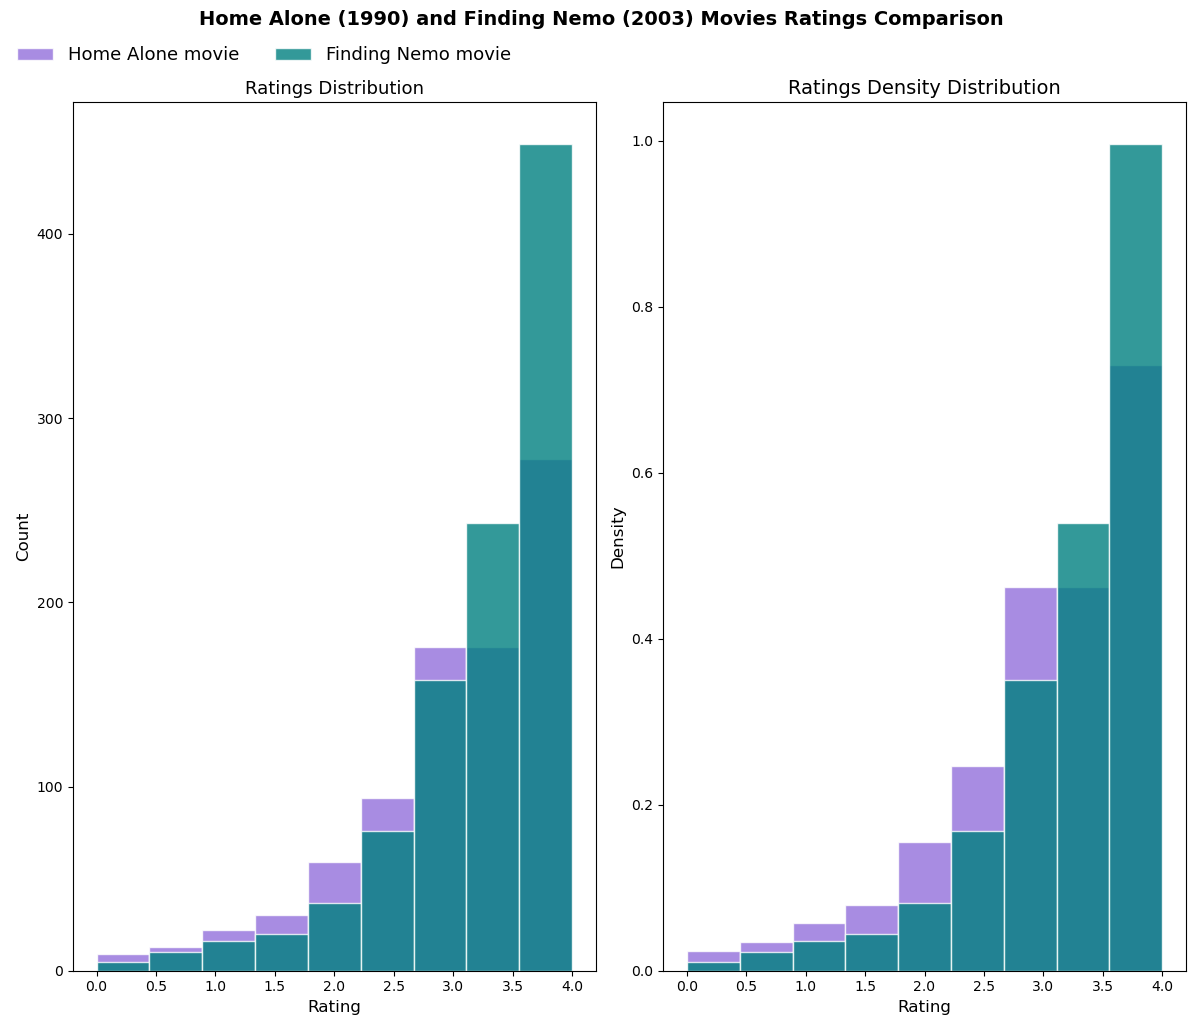

In [179]:
# preparing the graph
fig, axes = plt.subplots(1, 2, figsize=(12,10))

# Alone watchers 
axes[0].hist(home_alone, bins=9, color="mediumpurple", edgecolor="white", alpha=0.8)
axes[0].hist(finding_nemo, bins=9, color="teal", edgecolor="white", alpha=0.8)

# aesthetics
axes[0].set_title("Ratings Distribution", fontsize=13)
axes[0].set_xlabel("Rating", fontsize = 12)
axes[0].set_ylabel("Count", fontsize = 12)

# Social watchers 
axes[1].hist(home_alone, bins=9, color="mediumpurple", edgecolor="white", alpha=0.8, density = True)
axes[1].hist(finding_nemo, bins=9, color="teal", edgecolor="white", alpha=0.8, density = True)
axes[1].set_title("Ratings Density Distribution", fontsize=14)
axes[1].set_xlabel("Rating", fontsize = 12)
axes[1].set_ylabel("Density", fontsize = 12)



# common title
plt.suptitle("Home Alone (1990) and Finding Nemo (2003) Movies Ratings Comparison", fontsize=14, fontweight = "bold", 
             y = 1.02)


# common legend 
fig.legend(["Home Alone movie", 
            "Finding Nemo movie"], 
            fontsize = 13,
            loc = "upper left", 
            ncol = 2,
            bbox_to_anchor = (0, 1),
            frameon = False)


plt.tight_layout()
plt.show()


Both movies show a strong left-skewed distribution, meaning most viewers rated them on the higher end of the scale. However, the difference in height and shape between the bars suggests that Finding Nemo (2003) generally received higher and more consistent ratings than Home Alone (1990). The tallest bars for Finding Nemo at the 4.0 rating level show that a much larger share of people gave it top marks, while Home Alone ratings are slightly more spread between 2.0 and 3.5. The density plot reinforces this - Finding Nemo’s curve rises sharply and dominates across higher rating bins, indicating that its ratings are both more concentrated and more favorable overall. In short, both films were well liked, but Finding Nemo stands out as being more universally enjoyed and consistently rated higher.

We need to test that statistically. 

### Kolmogorov - Smirnov (KS) test

The question asks about a difference in distributions, not which movie is rated higher.
The KS test compares the entire shapes of the two distributions - it checks whether they come from the same underlying population, considering not just medians but also spread, skewness, and overall distributional form.

These are hypotheses for this test:

**Null hypothesis (H0):** The ratings distribution of Home Alone (1990) is the same as that of Finding Nemo (2003)

**Alternative hypothesis (Ha):** The ratings distribution of Home Alone (1990) differs from that of Finding Nemo (2003)

**Significance level:** 0.005

**Interpretation of p-value:** Probability of observing the data (or more extreme data) if the null hypothesis were true.


In [183]:
# conduct the test with statistic and p-values
u_statistic, p_value = stats.kstest(home_alone, finding_nemo, alternative='two-sided')

# usage
significance(0.005, p_value)

p = 6.3794e-10 < α = 0.005 = Reject H0 (statistically significant).


Since the p-value (6.3794e-10) is far smaller than the significance level α = 0.005, we reject the null hypothesis. This result is statistically significant, meaning the difference in rating distributions between Home Alone (1990) and Finding Nemo (2003) is extremely unlikely to have occurred by random chance. In practical terms, this indicates that the two movies were rated in meaningfully different ways - with Finding Nemo (2003) receiving higher and more consistently positive ratings, while Home Alone (1990) shows slightly more variability and a lower overall concentration of top scores.

However, we can not be sure about that since we only proved statistical difference, not which one is directionally higher or less. For that, additional statistical tests are required. 

